In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

##### Importing the csv file

In [2]:
df = pd.read_csv('250907_01bin.csv', sep=';')
df.head()

,sec,min,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13
0,100,"1,666666667",0,0,0,0,0,0,0,0,0,0,0,0,0
1,120,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,140,"2,333333333",0,0,0,0,0,0,0,0,1,0,0,0,0
3,160,"2,666666667",0,0,0,0,1,0,0,0,0,0,0,0,0
4,180,3,0,0,0,0,0,0,0,0,0,0,0,0,0


## Synchronisation events (30% of the neurons are active)

Adding a sum column (number of events for each t):

In [3]:
df['n_events'] = df.ix[:, 2:].sum(axis=1)
df.head()

,sec,min,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,n_events
0,100,"1,666666667",0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,120,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,140,"2,333333333",0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,160,"2,666666667",0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,180,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### Percentage of active neurons

In [4]:
df['active_neurons'] = df['n_events'] / 13
df.head()

,sec,min,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,n_events,active_neurons
0,100,"1,666666667",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000
1,120,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000
2,140,"2,333333333",0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.076923
3,160,"2,666666667",0,0,0,0,1,0,0,0,0,0,0,0,0,1,0.076923
4,180,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000


##### Synchronization events (30% of active neurons)

In [5]:
percentage_of_active_neurons = 0.3
df[df['active_neurons'] > 0.3]

,sec,min,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,n_events,active_neurons
117,2440,"40,66666667",1,1,0,0,0,0,0,0,0,1,0,1,0,4,0.307692
362,7340,"122,3333333",1,0,1,1,0,0,0,0,0,0,0,0,1,4,0.307692
425,8600,"143,3333333",0,1,1,0,1,1,0,0,0,0,0,0,0,4,0.307692
479,9680,"161,3333333",0,0,0,0,0,1,0,1,0,0,1,1,0,4,0.307692
507,10240,"170,6666667",0,0,1,0,0,1,0,0,0,0,0,1,1,4,0.307692


In [6]:
print("There are {} synchronization events with more than {}% of active neurons.".format(len(df[df['active_neurons'] > 0.3]), percentage_of_active_neurons*100))

There are 5 synchronization events with more than 30.0% of active neurons.


Adding a boolean column for the synchronisation events:

In [7]:
df['sync_events'] = False   # set a default value first
df.loc[(df['active_neurons'] > 0.3), 'sync_events'] = True
df.head()

,sec,min,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,n_events,active_neurons,sync_events
0,100,"1,666666667",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,False
1,120,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,False
2,140,"2,333333333",0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.076923,False
3,160,"2,666666667",0,0,0,0,1,0,0,0,0,0,0,0,0,1,0.076923,False
4,180,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,False


In [8]:
# Verification
#df[df['sync_events'] == True]

## All $\Delta$t between 2 events for each neuron

Test for one neuron

In [9]:
# print column 'sec' when neuron 'R1' has an activity
#df.loc[(df['R1'] == 1), 'sec']

In [10]:
dt_R1 = pd.DataFrame(df.loc[(df['R1'] == 1), 'sec'])
#dt_R1

In [11]:
# difference (=dt) and discard the 1st value (NaN value)
dt_R1 = dt_R1.diff()[1:]
#dt_R1.head()

In [12]:
dt_R1.mean()

sec    366.086957
dtype: float64

Analysis for all neurons

In [13]:
neuron_names = ['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11', 'R12', 'R13']

In [14]:
dt_neurons = {}
df_names = []
for neuron in neuron_names:
    df_name = 'df_dt' + neuron
    df_names.append(df_name)
    dt_neurons[df_name] = pd.DataFrame(df.loc[(df[neuron] == 1), 'sec'])

In [15]:
# print DataFrame df_dtR1
#dt_neurons['df_dtR1'].head()

In [16]:
#dt_neurons['df_dtR1'] = dt_neurons['df_dtR1'].diff()[1:]
#dt_neurons['df_dtR1'].head()

In [17]:
# difference (=dt) and discard the 1st value (NaN value)
for df_name in df_names:
    dt_neurons[df_name] = dt_neurons[df_name].diff()[1:]

In [18]:
dt_neurons['df_dtR1'].head()

,sec
73,280.0
117,880.0
136,380.0
148,240.0
206,1160.0


#### Summary statistics ($\Delta$t between all events for each neuron)

In [19]:
df_alldt = pd.concat(dt_neurons)
df_alldt.describe()

,sec
count,252.000000
mean,502.619048
std,451.414207
min,20.000000
25%,195.000000
50%,320.000000
75%,670.000000
max,2360.000000


## $\Delta$t before the first synchronization event

In [20]:
tot = 0
for df_name in df_names:
    tot += len(dt_neurons[df_name][dt_neurons[df_name].index<118])
print(tot)    

34


In [21]:
#synchronization events
df[df['sync_events'] == True].index

Int64Index([117, 362, 425, 479, 507], dtype='int64')

In [22]:
sync_event_index = df[df['sync_events'] == True].index
first_sync_event = sync_event_index[0]
first_sync_event

117

The first synchronization event is at measure (=index) 117

In [23]:
# for one neuron
dt_neurons['df_dtR1'][dt_neurons['df_dtR1'].index<first_sync_event+1]

,sec
73,280.0
117,880.0


##### NOTE that neuron R13 has no activity before measure 117!!!

In [24]:
dt_neurons['df_dtR13'][dt_neurons['df_dtR13'].index<first_sync_event+1]

,sec


In [25]:
# for all neurons
dt_before_firstevent = {}
for df_name in df_names:
    dt_before_firstevent[df_name] = dt_neurons[df_name][dt_neurons[df_name].index<first_sync_event+1]

#### Summary statistics ($\Delta$t before the first event)

In [26]:
df_dt_before_firstevent = pd.concat(dt_before_firstevent)
df_dt_before_firstevent.describe()

,sec
count,34.000000
mean,468.235294
std,378.165192
min,20.000000
25%,200.000000
50%,280.000000
75%,595.000000
max,1280.000000


#### NOTE that this mean value is not "exact" as R13 does not have any activity before the 1st synchronization event (so the mean value should be greater!)

$\Delta$t before the 1st synchronization event is a bit smaller that the total mean value.

## First $\Delta$t after the synchronization events

In [27]:
# Do not contain "dt before 1st sync event"
dt_after_sync = {}
df_dt_after_sync = []

for i in range(len(sync_event_index)):
    for df_name in df_names:
        if i == len(sync_event_index)-1:
            dt_after_sync[df_name] = dt_neurons[df_name][(dt_neurons[df_name].index>sync_event_index[i])][0:1]  # [0:1] take only the first peak after the sync event
        else:
            dt_after_sync[df_name] = dt_neurons[df_name][(dt_neurons[df_name].index>sync_event_index[i]) & (dt_neurons[df_name].index<sync_event_index[i+1]+1)][0:1]
            #print('{} - {}'.format(i, len(dt_but_first_after_sync[df_name])))
        try:
            df_dt_after_sync.append(dt_after_sync[df_name].get_values()[0,0])  # [0,0] because it is an array of array
        except:
            # discard when there is no new peak after the synchronization event
            print('no peaks after index {} for neuron {}'.format(sync_event_index[i], df_name))
df_dt_after_sync = pd.DataFrame(df_dt_after_sync)  # concatenate before tranforming to a dataframe because the values are a list of array

no peaks after index 362 for neuron df_dtR4
no peaks after index 362 for neuron df_dtR11
no peaks after index 425 for neuron df_dtR10
no peaks after index 479 for neuron df_dtR5
no peaks after index 479 for neuron df_dtR9
no peaks after index 507 for neuron df_dtR1
no peaks after index 507 for neuron df_dtR3
no peaks after index 507 for neuron df_dtR11
no peaks after index 507 for neuron df_dtR12


#### Summary statistics ($1st \Delta$t after the synchronization events)

In [28]:
df_dt_after_sync.describe()

,0
count,56.000000
mean,741.071429
std,559.407734
min,40.000000
25%,300.000000
50%,610.000000
75%,960.000000
max,2360.000000


## $\Delta$t after each synchronization but the first $\Delta$t

In [29]:
(dt_neurons[df_name].index>sync_event_index[0]) & (dt_neurons[df_name].index<sync_event_index[1])

array([ True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False], dtype=bool)

In [30]:
#sync_event_index

In [31]:
#dt_neurons['df_dtR1'][(dt_neurons['df_dtR1'].index>sync_event_index[0]) & (dt_neurons['df_dtR1'].index<sync_event_index[0+1]+1)][1:].get_values()[:,0]

In [32]:
# number of measures
#first = 1
#tot = 0
#for i in range(len(sync_event_index)-1):
#    for df_name in df_names:
#        tot += len(dt_neurons[df_name][(dt_neurons[df_name].index>sync_event_index[i]) & (dt_neurons[df_name].index<sync_event_index[i+1]+1)][first:])
#for df_name in df_names:
#    tot += len(dt_neurons[df_name][(dt_neurons[df_name].index>sync_event_index[len(sync_event_index)-1])][first:])
#tot

In [33]:
# Do not contain "dt before 1st sync event"
dt_but_first_after_sync = {}
df_dt_but_first_after_sync = []

for i in range(len(sync_event_index)):
    for df_name in df_names:
        if i == len(sync_event_index)-1:
            dt_but_first_after_sync[df_name] = dt_neurons[df_name][(dt_neurons[df_name].index>sync_event_index[i])][1:]  # [1:] does not take the first peak after the sync event (already in another dataframe)
        else:
            dt_but_first_after_sync[df_name] = dt_neurons[df_name][(dt_neurons[df_name].index>sync_event_index[i]) & (dt_neurons[df_name].index<sync_event_index[i+1]+1)][1:]
            #print('{} - {}'.format(i, len(dt_but_first_after_sync[df_name])))
        try:
            df_dt_but_first_after_sync.append(dt_but_first_after_sync[df_name].get_values()[:,0])  # [:,0] because it is an array of array
        except:
            # discard when there is no new peak after the synchronization event
            print('no peaks after index {} for neuron {}'.format(sync_event_index[i], df_name))
df_dt_but_first_after_sync = pd.DataFrame(np.concatenate(np.array(df_dt_but_first_after_sync)))  # concatenate before tranforming to a dataframe because the values are a list of array

#### Summary statistics ($\Delta$t after each synchronization but the first $\Delta$t)

In [34]:
df_dt_but_first_after_sync.describe()

,0
count,162.000000
mean,427.407407
std,394.653013
min,20.000000
25%,180.000000
50%,290.000000
75%,540.000000
max,2240.000000


Should I merge this dataframe with df_dt_before_firstevent?

In [35]:
try:
    assert len(df_alldt) == len(df_dt_before_firstevent) + len(df_dt_after_sync) + len(df_dt_but_first_after_sync)
except AssertionError:
    print("*******************************************************\n")
    print("There is an error in the analysis: the number of dt in each sub-dataframe should be equal to the number of dt in the dataframe df_alldt")
    print("*******************************************************")
else:
    print("The number of dt in each frame is correct.")

The number of dt in each frame is correct.


# Plot

Concatenate the 4 dataframes

In [36]:
# using pd.DataFrame(XXX.get_values()) to get the "same numerotation" and concatenate the 4 dataframes
df_results = pd.concat([pd.DataFrame(df_alldt.get_values()), pd.DataFrame(df_dt_before_firstevent.get_values()), df_dt_but_first_after_sync, df_dt_after_sync], axis=1)

In [37]:
df_results.columns = ['all dt', 'dt before 1st sync', 'dt after sync event but 1st dt', '1st dt after sync event']
df_results.head()

,all dt,dt before 1st sync,dt after sync event but 1st dt,1st dt after sync event
0,280.0,280.0,240.0,380.0
1,880.0,880.0,1160.0,600.0
2,380.0,840.0,300.0,920.0
3,240.0,540.0,320.0,40.0
4,1160.0,20.0,920.0,1720.0


<IPython.core.display.Javascript object>


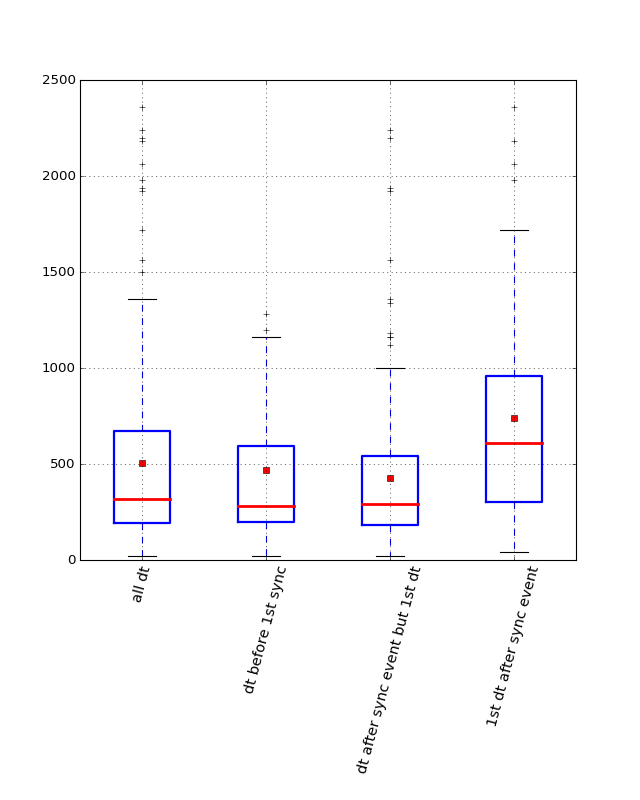

In [38]:
plt.figure(figsize=(8,10))
plt.gcf().subplots_adjust(bottom=0.30)  #to make room for the labels
boxprops = dict(linewidth=2)
medianprops = dict(linestyle='-', linewidth=2.5)

df_results.boxplot(return_type='axes', rot=75, fontsize=13, showmeans=True, boxprops=boxprops, medianprops=medianprops)

## Summary 

In [39]:
# Problem with dropna() and describe() (all the rows with NaN are discarded)
#df_results.dropna().describe()
pd.DataFrame([df_results['all dt'].describe() , df_results['dt before 1st sync'].dropna().describe(), df_results['dt after sync event but 1st dt'].dropna().describe() , df_results['1st dt after sync event'].dropna().describe()])

,count,mean,std,min,25%,50%,75%,max
all dt,252.0,502.619048,451.414207,20.0,195.0,320.0,670.0,2360.0
dt before 1st sync,34.0,468.235294,378.165192,20.0,200.0,280.0,595.0,1280.0
dt after sync event but 1st dt,162.0,427.407407,394.653013,20.0,180.0,290.0,540.0,2240.0
1st dt after sync event,56.0,741.071429,559.407734,40.0,300.0,610.0,960.0,2360.0
